# Wine Data

## Load and inspect the data

#### Load the wine.csv file located in ../assets/

In [285]:
import pandas as pd

In [286]:
df = pd.read_csv('../assets/winequality-red.csv', delimiter=';')

#### Verify the data has loaded correctly. Can you look at a few rows?

In [287]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Let's investigate how the various factors affect quality. 

#### Compute the mean of each quality class.

In [288]:
import scipy.stats as stats

In [289]:
QualGrp = df.groupby('quality') #for easier future use

In [290]:
QualGrp.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [206]:
df['quality'].unique() 
#just making sure all the qualities are included in my answer

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Volatile acidity seems to be related to quality. Let's plot it's distribution by class to verify. Try using a boxplot.

In [231]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


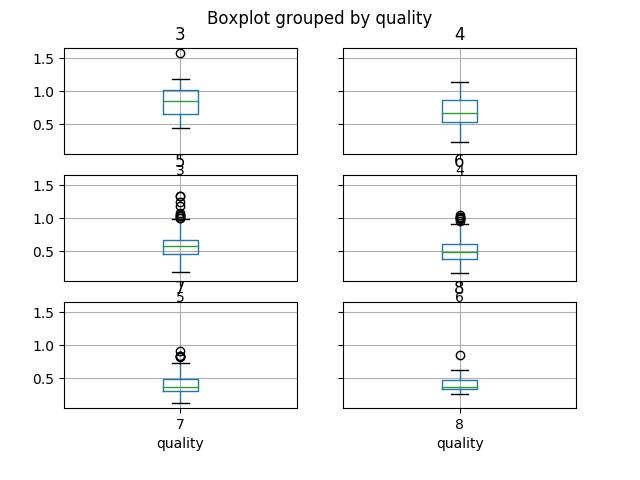

In [208]:
boxplot = QualGrp.boxplot(column='volatile acidity', by='quality')

#### While both the mean and the median indicate a trend, sometimes you have to be careful extrapolating from small amounts of data. Check if the classes are balanced.

In [209]:
QualGrp['volatile acidity'].count() 

#df.groupby('quality')['volatile acidity'].count() 
#just doing it both ways

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: volatile acidity, dtype: int64

#### Replot the data removing groups with less than 20 entries.

[5 6 7 4]


<IPython.core.display.Javascript object>


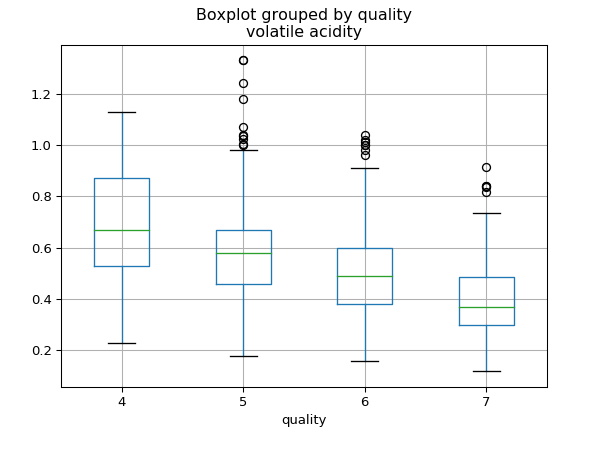

In [284]:
Qualfilter= df.groupby('quality').filter(lambda x: len(x)>20)

print Qualfilter['quality'].unique() #checking all the groups are expect are included

fltboxplot = Qualfilter.boxplot(column='volatile acidity', by='quality')

#### Do quality 7 wines have lower volatile acidity than quality 4? Formulate a null and alternative hypothesis.

Ho = quality 7 wines have the same volatile acidity as quality 4
Ha = quality 7 wines have a lower volatile acidity than quality 4

#### Do you think the data is normally distributed? Look at the skew.

In [211]:
Qualfilter.groupby('quality')['volatile acidity'].skew()

#What is the best way to also filter it so I am only seeing the skew 
#for groups where quality ==4 or ==7?

quality
4    0.157637
5    0.593714
6    0.434792
7    0.957271
Name: volatile acidity, dtype: float64

#### Is the effect statistically significant? Be careful to use an appropriate test.

Used Ranksums test because:
- Volatile acidity is continuous
- Sample size different for each quality
- At least one of the populations is not normally dist:
    - Volatile acidity for quality ==7 is not normal
    - Volatile acidity for quality ==4 could go either way, do you agree?

The effect is statistically significant at a low pvalue.

In [212]:
testgrp= df.groupby('quality')['volatile acidity']

Q4 = testgrp.get_group(4)
Q7 = testgrp.get_group(7)

stats.ranksums(Q4, Q7)


RanksumsResult(statistic=8.18352979589746, pvalue=2.7564808095644341e-16)

#### What test would you use if you wanted to compare all 4 of the remaining quality levels?

I would use the Kruskal Wallis test because:
- Volatile acidity is continuous
- There are more than 3 categories
- At least one of the populations is not normally dist, so we can't make assume normality

## Density looks like it may be related as well, but it's challenging to discern with such small changes in the mean by group. 

#### Normalize the column (i.e., for each entry in the column, subtract the column mean and divide by the column standard deviation). Store the result in a column called density_norm.

In [255]:
mean = df['density'].mean()
std = df['density'].std()

df['density_norm'] = df.groupby('quality')['density'].apply(lambda x: (x - mean)/std)


#### Plot the distribution of normalized density by quality.

<IPython.core.display.Javascript object>


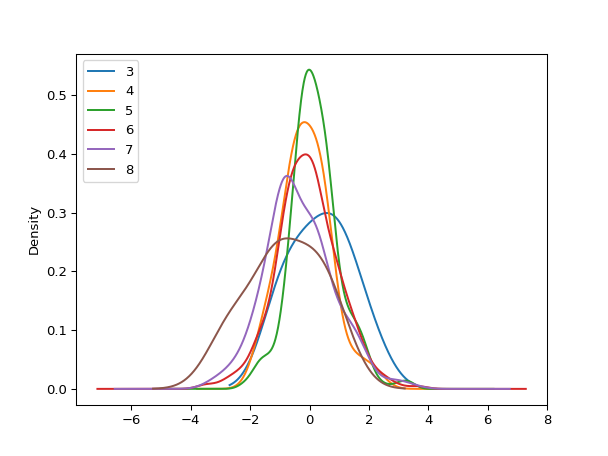

In [257]:
#plt.plot(df.index, df['quality'])
%matplotlib notebook

QualGrp['density_norm'].plot(kind='density')
plt.legend(loc='upper left')

## Summary

#### Create a single table showing the median/IQR of volatile acidity and the mean/std of density by group.

In [283]:
MVA = df.groupby('quality')['volatile acidity'].median()

Q75VA=df.groupby('quality')['volatile acidity'].quantile(.75)
Q25VA=df.groupby('quality')['volatile acidity'].quantile(.25)

IQRVA = Q75VA - Q25VA

mean_density=df.groupby('quality')['density'].mean()
STD_density=df.groupby('quality')['density'].std()

df2 = pd.DataFrame({'med_volatile_acidity': MVA, 'IQR_volatile_acidity': IQRVA,'mean_density':mean_density, 'STD_density':STD_density})

print df2

         IQR_volatile_acidity  STD_density  mean_density  med_volatile_acidity
quality                                                                       
3                      0.3625     0.002002      0.997464                 0.845
4                      0.3400     0.001575      0.996542                 0.670
5                      0.2100     0.001589      0.997104                 0.580
6                      0.2200     0.002000      0.996615                 0.490
7                      0.1850     0.002176      0.996104                 0.370
8                      0.1375     0.002378      0.995212                 0.370


#### Are there any other factors you think are different across wines of different quality? Present a convincing argument with data.

<IPython.core.display.Javascript object>


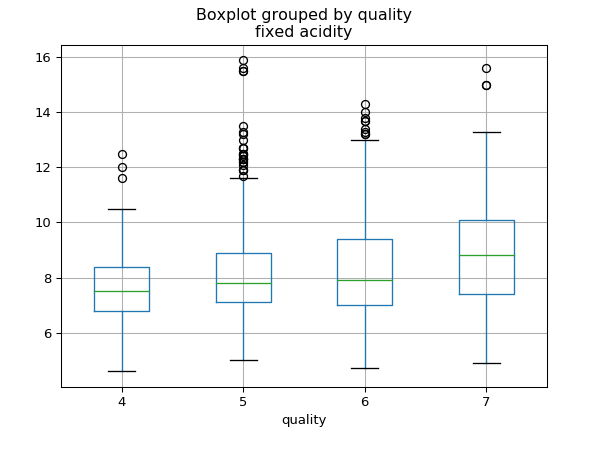

In [292]:
boxplot = Qualfilter.boxplot(column='fixed acidity', by='quality')

In [293]:
Qualfilter.groupby('quality')['fixed acidity'].skew()

quality
4    0.920379
5    1.382946
6    0.834111
7    0.514406
Name: fixed acidity, dtype: float64

In [294]:
testgrp2= df.groupby('quality')['fixed acidity']

Q4 = testgrp2.get_group(4)
Q5 = testgrp2.get_group(5)
Q6 = testgrp2.get_group(6)
Q7 = testgrp2.get_group(7)

stats.kruskal(Q4, Q5, Q6, Q7)

KruskalResult(statistic=30.029894276982311, pvalue=1.3602185819940381e-06)

Fixed acidity might have an effect. The pvalue running the Kruskal test was low. The boxplots also told a story of increased fixed acidity with increases in quality.